# Tugas 2 - Online Shoppers Purchasing Intention

### Problem Statement 

### Business Analysis Value

#### 1 - Import Library

In [7]:
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'

from calendar import month_abbr

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import zscore

from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### 2 - Import Data

In [23]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
fig = px.histogram(df, x="Revenue", barmode="group", title="<b>Revenue distribution<b>")
fig.update_layout(width=800, height=500, bargap=0.1)
fig.show()


#### 2 - Data Preprocessing

In [24]:
lower_ma = [m.lower() for m in month_abbr]
df['Month'] = df['Month'].replace('June', 'jun')
df['Month'] = df['Month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  Int8   
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [26]:
df_normalized = df
numeric_cols = df.select_dtypes(include=[np.float64]).columns
numeric_cols
df_normalized[numeric_cols] = df[numeric_cols].apply(zscore)

In [28]:
label, uniques = pd.factorize(df_normalized['VisitorType'])
df_normalized['VisitorType'] = label

In [29]:
df_normalized.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,1,1,1,1,0,False,False
1,0,-0.457191,0,-0.244931,2,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,2,2,1,2,0,False,False
2,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,4,1,9,3,0,False,False
3,0,-0.457191,0,-0.244931,2,-0.622954,0.573535,1.994610,-0.317178,-0.308821,2,3,2,2,4,0,False,False
4,0,-0.457191,0,-0.244931,10,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,2,3,3,1,4,0,True,False


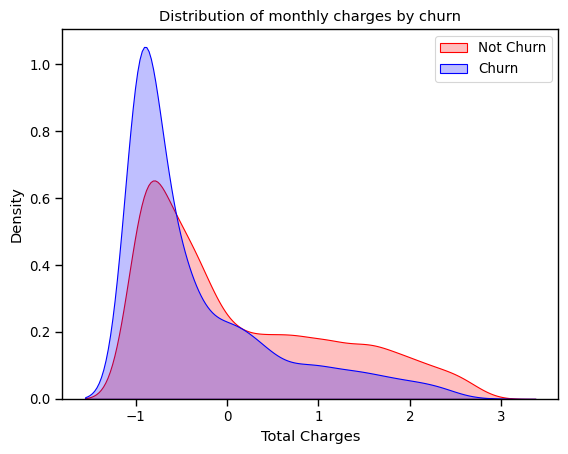

In [108]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df_normalized.TotalCharges[(df_normalized["Churn"] == 'No') ],
                color="Red", fill = True);
ax = sns.kdeplot(df_normalized.TotalCharges[(df_normalized["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of monthly charges by churn');

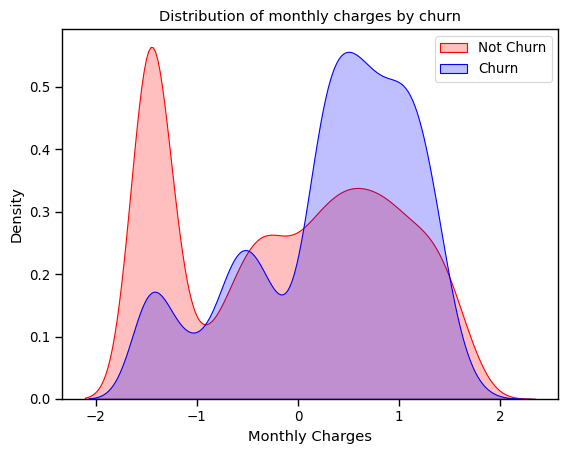

In [91]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df_normalized.MonthlyCharges[(df_normalized["Churn"] == 'No') ],
                color="Red", fill = True);
ax = sns.kdeplot(df_normalized.MonthlyCharges[(df_normalized["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

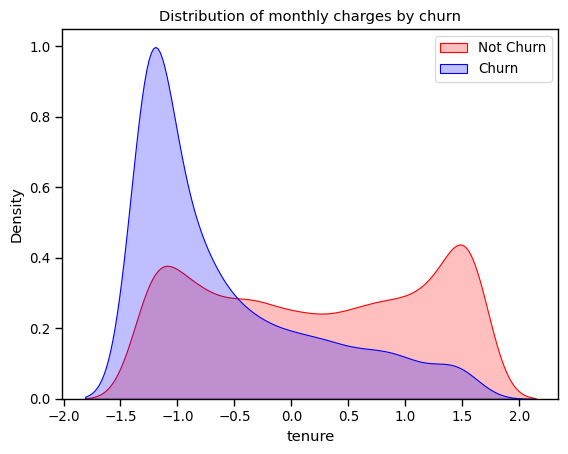

In [92]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df_normalized.tenure[(df_normalized["Churn"] == 'No') ],
                color="Red", fill = True);
ax = sns.kdeplot(df_normalized.tenure[(df_normalized["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('tenure');
ax.set_title('Distribution of monthly charges by churn');

In [30]:
X = df_normalized.drop(columns=['Revenue'])
y = df_normalized['Revenue']

In [55]:
threshold = 5 # the number of most relevant features
high_score_features = []
feature_scores = f_classif(X, y)[0]
for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
      print(f_name, ':', score)
      high_score_features.append(f_name)

PageValues : 3949.262959963745
ExitRates : 552.2865021045083
ProductRelated : 317.8443503021458
ProductRelated_Duration : 293.0276033848508
BounceRates : 286.37567372935024


In [56]:
X = X[high_score_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
# Create a Random Forest Tree classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_clf = clf.predict(X_test)

In [58]:
# Create a logistic regression classifier
lre = LogisticRegression()

# Train the classifier on the training data
lre.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lre = lre.predict(X_test)

In [59]:
# Create a Naive Bayes classifier
nab = GaussianNB()

# Train the classifier on the training data
nab.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nab = nab.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred_lre)
precision = precision_score(y_test, y_pred_lre, pos_label=False)
recall = recall_score(y_test, y_pred_lre, pos_label=False)
f1 = f1_score(y_test, y_pred_lre, pos_label=False)

print('Accuracy:', accuracy,', Precision:', precision,', Recall:', recall,', F1 score:', f1)

Accuracy: 0.8757703535517353 , Precision: 0.8861334264757248 , Recall: 0.9780262143407864 , F1 score: 0.9298149166208539


In [62]:
accuracy = accuracy_score(y_test, y_pred_clf)
precision = precision_score(y_test, y_pred_clf, pos_label=False)
recall = recall_score(y_test, y_pred_clf, pos_label=False)
f1 = f1_score(y_test, y_pred_clf, pos_label=False)

print('Accuracy:', accuracy,', Precision:', precision,', Recall:', recall,', F1 score:', f1)

Accuracy: 0.8855011352578657 , Precision: 0.9142329020332717 , Recall: 0.9533538936006168 , F1 score: 0.933383657293829


In [63]:
accuracy = accuracy_score(y_test, y_pred_nab)
precision = precision_score(y_test, y_pred_nab, pos_label=False)
recall = recall_score(y_test, y_pred_nab, pos_label=False)
f1 = f1_score(y_test, y_pred_nab, pos_label=False)

print('Accuracy:', accuracy,', Precision:', precision,', Recall:', recall,', F1 score:', f1)

Accuracy: 0.8582549464807007 , Precision: 0.9234393404004712 , Recall: 0.9067077872012336 , F1 score: 0.9149970822797121
